Accuracy: 0.850
AUC: 0.938


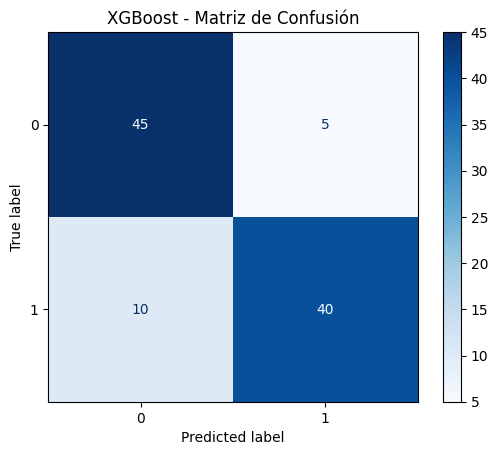

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)

import xgboost as xgb

# ===== 1) Datos sintéticos de clasificación binaria =====
X, y = make_classification(
    n_samples=400, n_features=8, n_informative=5,
    n_redundant=1, n_classes=2, random_state=42
)
y = y.astype(int)  # Asegurar etiquetas enteras 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ===== 2) Crear el modelo XGBoost =====
model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

# ===== 3) Entrenar =====
model.fit(X_train, y_train)

# ===== 4) Predicciones y métricas =====
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("XGBoost - Matriz de Confusión")
plt.show()